In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
import wittgenstein as lw
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv('log2.csv')

In [38]:
data.columns = data.columns.str.strip()
data = data.drop(columns=['NAT Source Port', 'NAT Destination Port','Elapsed Time (sec)'])


In [39]:
columns = ['Source Port', 'Destination Port',
           'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'pkts_sent', 'pkts_received']
data[columns] = MinMaxScaler().fit_transform(data[columns])
print(data)

       Source Port  Destination Port Action         Bytes    Bytes Sent  \
0         0.873165          0.000809  allow  9.217251e-08  3.584694e-08   
1         0.858455          0.051713  allow  3.708959e-06  1.623655e-06   
2         0.104999          0.767849  allow  1.402283e-07  6.115066e-08   
3         0.771401          0.051713  allow  2.573740e-06  1.452855e-06   
4         0.762993          0.006760  allow  1.992974e-05  7.082933e-06   
...            ...               ...    ...           ...           ...   
65527     0.971877          0.001221  allow  2.001010e-07  1.391705e-07   
65528     0.777673          0.001221  allow  3.687436e-03  7.090524e-05   
65529     0.837291          0.006790   drop  7.877992e-09  1.054322e-08   
65530     0.837275          0.006790   drop  7.877992e-09  1.054322e-08   
65531     0.837230          0.006790   drop  7.877992e-09  1.054322e-08   

       Bytes Received       Packets  pkts_sent  pkts_received  
0        2.586622e-07  9.651438e-07

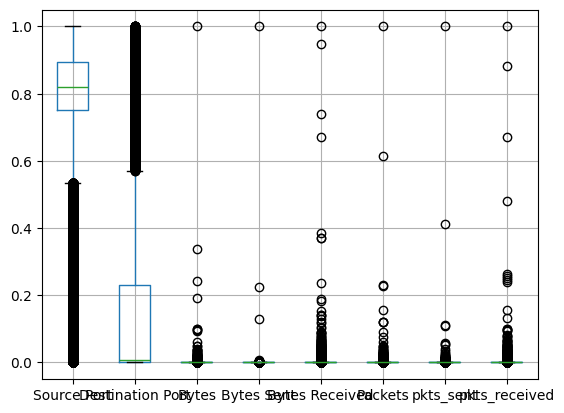

In [40]:
import matplotlib.pyplot as plt

data[columns].boxplot()
plt.show()

In [41]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
print(len(data))
data = remove_outliers(data, columns)

print(f"outlier ustasni daraa: {len(data)}")

65532
outlier ustasni daraa: 25154


In [42]:
data['Action'].replace(['allow', 'drop','deny','reset-both'], [1, 0,0,0], inplace=True)
print(['Action'])

['Action']


/tmp/ipykernel_59033/2471199123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Action'].replace(['allow', 'drop','deny','reset-both'], [1, 0,0,0], inplace=True)
/tmp/ipykernel_59033/2471199123.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Action'].replace(['allow', 'drop','den

In [43]:
X = data.drop(columns=["Action"])
y = data["Action"]
print(X.head())
print(y.head())

    Source Port  Destination Port         Bytes    Bytes Sent  Bytes Received  \
0      0.873165          0.000809  9.217251e-08  3.584694e-08    2.586622e-07   
13     0.848369          0.000809  8.508232e-08  2.741236e-08    2.555458e-07   
17     0.767251          0.000809  1.063529e-07  4.428151e-08    2.898264e-07   
18     0.873165          0.000809  9.217251e-08  3.584694e-08    2.586622e-07   
19     0.865352          0.000809  9.217251e-08  3.584694e-08    2.586622e-07   

         Packets  pkts_sent  pkts_received  
0   9.651438e-07        0.0       0.000003  
13  9.651438e-07        0.0       0.000003  
17  9.651438e-07        0.0       0.000003  
18  9.651438e-07        0.0       0.000003  
19  9.651438e-07        0.0       0.000003  
0     1
13    1
17    1
18    1
19    1
Name: Action, dtype: int64


In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [45]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred = clf.predict(X_test)

print("Decision Tree:")
print(y_pred)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {accuracy:.2f}")

print("\nDecision Tree Classification:")
print(classification_report(y_test, y_pred))

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree:
[0 0 0 ... 0 1 1]

Decision Tree Accuracy: 1.00

Decision Tree Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2654
           1       1.00      1.00      1.00      2377

    accuracy                           1.00      5031
   macro avg       1.00      1.00      1.00      5031
weighted avg       1.00      1.00      1.00      5031


Decision Tree Confusion Matrix:
[[2654    0]
 [   0 2377]]


In [47]:
train, test = train_test_split(data, random_state = 42)
print(f"train: {len(train)}")
print(f"test: {len(test)}")

train: 18865
test: 6289


In [48]:
train['Action'] = train['Action'].replace({'allow': 1, 'deny': 0, 'drop': 0, 'reset-both': 0})
test['Action'] = test['Action'].replace({'allow': 1, 'deny': 0, 'drop': 0, 'reset-both': 0})

In [49]:
ripper = lw.RIPPER(random_state=42, verbosity=0)
ripperModel = ripper.fit(trainset=train, class_feat='Action', pos_class=1)

In [50]:
ripper.ruleset_.out_pretty()
cond_count = ripper.ruleset_.count_conds()
print(cond_count)

[[Packets=9.65143830559349e-07] V
[Bytes=7.9e-09-8.5e-08 ^ BytesSent=2.7e-08-3.6e-08 ^ SourcePort=<0.76] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=0.82-0.85] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=0.76-0.78] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=0.86-0.87] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=<0.76 ^ DestinationPort=0.00081-0.0068] V
[Bytes=7.9e-09-8.5e-08 ^ BytesSent=2.7e-08-3.6e-08 ^ SourcePort=0.96-0.99] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=0.85-0.86] V
[Bytes=7.9e-09-8.5e-08 ^ BytesSent=1.1e-08-2.7e-08 ^ SourcePort=0.91-0.96] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=<0.76 ^ BytesSent=1.1e-08-2.7e-08] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=0.78-0.82 ^ BytesSent=2.7e-08-3.6e-08] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=>0.99 ^ BytesSent=>4.4e-08] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=>0.99 ^ BytesSent=3.8e-08-4.4e-08] V
[DestinationPort=<0.00081 ^ Bytes=7.9e-09-8.5e-08 ^ SourcePort=0.87-0.91] V
[Bytes=7.9e-09-8.5e-08 ^ SourcePort=>0.99 ^ BytesSent=3.6e-08-3.8e-08] V
[DestinationPort=<0.00081 ^

In [51]:
predict_test = ripper.predict(test)
predict_train = ripper.predict(train)
print("ripper train:", accuracy_score(train['Action'], predict_train))
print("ripper test :", accuracy_score(test['Action'], predict_test))
cm_ripper = confusion_matrix(test['Action'], predict_test)
print("Confusion Matrix for RIPPER:")
print(cm_ripper)

ripper train: 0.9936390140471774
ripper test : 0.989982509142948
Confusion Matrix for RIPPER:
[[3329    8]
 [  55 2897]]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [53]:
Y_predTest = nb.predict(X_test)
Y_predTrain = nb.predict(X_train)
print("Bayes train:", accuracy_score(y_train, Y_predTrain))
print("Bayes test:", accuracy_score(y_test, Y_predTest))
cm_gnb = confusion_matrix(y_test, Y_predTest)
print("Confusion Matrix for Bayes:")
print(cm_gnb)

Bayes train: 0.9761466801162998
Bayes test: 0.9745813757378629
Confusion Matrix for Bayes:
[[4271  126]
 [  85 3819]]


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
svm_model = SVC(C=1, kernel='linear', gamma='auto')
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'CVM Accuracy = {accuracy}')

Y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:\n', conf_matrix)

CVM Accuracy = 0.5275293182269927
Confusion Matrix:
 [[2654    0]
 [2377    0]]


In [56]:
k_range = range(1, 21)
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    Y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'k = {k}, Accuracy = {accuracy}')

k = 1, Accuracy = 0.9866825680779169
k = 2, Accuracy = 0.9821109123434705
k = 3, Accuracy = 0.9827072152653548
k = 4, Accuracy = 0.9825084476247267
k = 5, Accuracy = 0.9817133770622143
k = 6, Accuracy = 0.9805207712184456
k = 7, Accuracy = 0.9809183064997018
k = 8, Accuracy = 0.98111707414033
k = 9, Accuracy = 0.9805207712184456
k = 10, Accuracy = 0.9809183064997018
k = 11, Accuracy = 0.9813158417809581
k = 12, Accuracy = 0.9803220035778175
k = 13, Accuracy = 0.9797257006559332
k = 14, Accuracy = 0.9797257006559332
k = 15, Accuracy = 0.9797257006559332
k = 16, Accuracy = 0.979328165374677
k = 17, Accuracy = 0.9801232359371894
k = 18, Accuracy = 0.9801232359371894
k = 19, Accuracy = 0.9807195388590737
k = 20, Accuracy = 0.9801232359371894


In [57]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.9978135559530908


In [58]:
bagging_model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=20), n_estimators=50, random_state=42)
bagging_model.fit(X_train, Y_train)
Y_pred_bagging = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(Y_test, Y_pred_bagging)
print(f'Bagging Accuracy: {bagging_accuracy}')

Bagging Accuracy: 0.9809183064997018


In [ ]:
boosting_model = AdaBoostClassifier(estimator=SVC(probability=True, kernel='linear', C=1, gamma='auto'), n_estimators=10, random_state=42)
boosting_model.fit(X_train, Y_train)
Y_pred_boosting = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(Y_test, Y_pred_boosting)
print(f'Boosting Accuracy: {boosting_accuracy}')

/mnt/Chungus/Hicheel/3A/ugugdul/biydaalt/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
